# Importing Modules and loading data

In [ ]:
import sys
import os
sys.path.append('./Scripts')
sys.path.append('./Files')
sys.path.append('./Datasets')

In [2]:
os.system('pip install nltk')
os.system('pip install openpyxl')
os.system('pip install emot')

0

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import openpyxl
import emot
import pickle

# from google.colab import files
from nltk.corpus import stopwords
import nltk
import seaborn as sns
nltk.download('punkt')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

from Sequencer import Sequencer
from helper_fns import write_dict
from helper_fns import read_dict

from dataCleaner import clean_arabic_text

import ArStemmerLib as lib
import lexicon
from lexicon import calc_lexicon

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\youss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
df = pd.read_csv('Datasets/merged_train_datasets.csv')
df = df.rename(columns={"text":"tweet"})

try:
    df.drop(columns=['Unnamed: 0'], inplace = True)
except:
    pass

In [8]:
# tweets_df = pd.read_csv('Datasets/tweets_sns2.csv')
# keep_regex = "[Vv]odafone|VODAFONE|فودافون|[Ee]tisalat|ETISALAT|اتصالات|[Oo]range|ORANGE|اورانج|موبينيل|إتصالات|أورانج"
# remove_regex = "لون"
# drop_indeces = tweets_df[(tweets_df['text'].str.contains(keep_regex)==False) | (tweets_df['text'].str.contains(remove_regex)==True)].index
# tweets_df.drop(drop_indeces, inplace=True)
# tweets= tweets_df['text'].copy()
# tweets2 = df['tweet'].copy()
# tokens1 = set(nltk.word_tokenize(' '.join(tweets.to_numpy().flatten())))
# tokens2 = set(nltk.word_tokenize(' '.join(tweets2.to_numpy().flatten())))
# def tweet_filter(tweet: str, bucket: set[str]) -> bool:
#     tokens = set(nltk.word_tokenize(tweet))
#     inclusion_ratio =  len(tokens.intersection(bucket)) / len(tokens)
#     return inclusion_ratio >= 0.5

# filtered_tweets = tweets.to_numpy()[[tweet_filter(x, tokens2) for x in tweets.to_numpy()]]

In [19]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819 entries, 0 to 6636
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      5819 non-null   object
 1   sentiment  5819 non-null   object
dtypes: object(2)
memory usage: 136.4+ KB


In [6]:
df.head()

,tweet,sentiment
0,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,positive
1,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,negative
2,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,neutral
3,#انتخبوا_العرص #انتخبوا_البرص #مرسى_رئيسى #اين...,neutral
4,امير عيد هو اللي فعلا يتقال عليه ستريكر صريح #...,positive


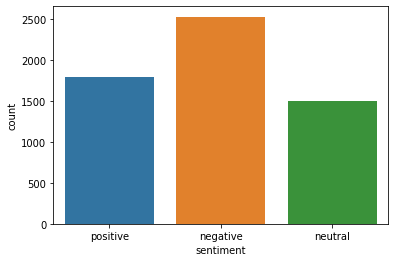

In [7]:
_ = sns.countplot(x='sentiment', data=df)

# Calling methods for preprocessing

In [21]:
df['tweet']

1        أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...
2        البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...
4        الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...
5        #انتخبوا_العرص #انتخبوا_البرص #مرسى_رئيسى #اين...
6        امير عيد هو اللي فعلا يتقال عليه ستريكر صريح #...
                               ...                        
14283    لا ولاقى واحد بيقول قطر بتمول الوايت نايتس !!!...
14284    اقسم بالله شركه اورانج دى عليها كرم وذوق عدى ا...
14285    اعلان فودافون عمرو دياب واعلان اورانج  واعلان ...
14286                   اعلان فودافون يستاهل يطلع تريند ♥️
14287    منزلة ستوري واتساب ع حوار إنك تفتح نت من فوداف...
Name: tweet, Length: 7502, dtype: object

In [20]:
df['tweet'] = df.tweet.map(lambda tweet : clean_arabic_text(tweet))

# Vectorizers

In [8]:
count_vec = CountVectorizer(ngram_range=(1,1))

In [9]:
tfidf_vec = TfidfVectorizer()

# Splitting data

In [33]:
df = pd.read_csv("Text Preprocessing Experimentations/exp1_train_rtp_rl_re_cat_rl_qalsadi.csv")
df.dropna(inplace=True)

In [61]:
X_train_tfidf,X_test_tfidf,Y_train_tfidf,Y_test_tfidf = train_test_split(tfidf_vec.fit_transform(df['tweet']), df['sentiment'], test_size=0.25, random_state=1)

In [62]:
X_train_count,X_test_count,Y_train_count,Y_test_count = train_test_split(count_vec.fit_transform(df['tweet']), df['sentiment'], test_size=0.25, random_state=1)

In [63]:
X_train ,X_test ,Y_train ,Y_test  = train_test_split(df['tweet'], df['sentiment'], test_size=0.25, random_state=1)

In [37]:
Y_test_tfidf.head()

6333    positive
4891    positive
1050     neutral
5629     neutral
6434     neutral
Name: sentiment, dtype: object

In [15]:
le = LabelEncoder()
Y_test_tfidf = le.fit_transform(Y_test_tfidf)
Y_test_count = le.fit_transform(Y_test_count)
Y_test = le.fit_transform(Y_test)
Y_train_tfidf = le.fit_transform(Y_train_tfidf)
Y_train_count = le.fit_transform(Y_train_count)
Y_train = le.fit_transform(Y_train)

# Naive Bayes

In [64]:
cl = MultinomialNB()

## Using Lexicon and Count Vectorization

In [65]:
#calculate the lexicon
tweet_train_lex = []
for tweet in X_train:
    tweet_train_lex.append(calc_lexicon(u"%s" %tweet))

tweet_test_lex = []
for tweet in X_test:
    tweet_test_lex.append(calc_lexicon(u"%s" %tweet))

In [66]:
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
tweet_lex_train_sparse = csr_matrix(tweet_train_lex)
tweet_lex_test_sparse = csr_matrix(tweet_test_lex)
tweet_lex_test_sparse

<1455x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1163 stored elements in Compressed Sparse Row format>

In [67]:
train_feature_matrix = hstack((X_train_count, tweet_lex_train_sparse))
test_feature_matrix = hstack((X_test_count, tweet_lex_test_sparse))
test_feature_matrix

<1455x16716 sparse matrix of type '<class 'numpy.float64'>'
	with 13575 stored elements in Compressed Sparse Row format>

In [68]:
nb_lexicon = cl.fit(train_feature_matrix,Y_train)
predicted = cl.predict(test_feature_matrix)
acc = accuracy_score(Y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (classification_report(Y_test,predicted))

accuracy = 59.03780068728523%
              precision    recall  f1-score   support

    negative       0.62      0.77      0.68       639
     neutral       0.41      0.21      0.28       371
    positive       0.61      0.66      0.63       445

    accuracy                           0.59      1455
   macro avg       0.55      0.54      0.53      1455
weighted avg       0.56      0.59      0.57      1455



In [49]:
nb_lex_model_path = 'Models/nb_lexicon_model.sav'
pickle.dump(nb_lexicon, open(nb_lex_model_path,'wb'))

## Using TF-IDF

In [69]:
nb_tfidf = cl.fit(X_train_tfidf, Y_train_tfidf)
p = cl.predict(X_test_tfidf)
acc = accuracy_score(Y_test_tfidf,p)
print ('accuracy = '+str(acc*100)+'%')
print (classification_report(Y_test,p))

accuracy = 56.42611683848797%
              precision    recall  f1-score   support

    negative       0.53      0.93      0.67       639
     neutral       0.48      0.03      0.06       371
    positive       0.70      0.49      0.58       445

    accuracy                           0.56      1455
   macro avg       0.57      0.48      0.44      1455
weighted avg       0.57      0.56      0.49      1455



In [51]:
nb_tfidf_model_path = 'Models/nb_tfidf_model.sav'
pickle.dump(nb_tfidf, open(nb_tfidf_model_path,'wb'))

# Lexicon + TF-IDF

In [70]:
train_feature_matrix_tf = hstack((X_train_tfidf, tweet_lex_train_sparse))
test_feature_matrix_tf = hstack((X_test_tfidf, tweet_lex_test_sparse))
test_feature_matrix_tf

<1455x16716 sparse matrix of type '<class 'numpy.float64'>'
	with 13575 stored elements in Compressed Sparse Row format>

In [71]:
nb_lex_tfidf = cl.fit(train_feature_matrix_tf,Y_train)
predicted = cl.predict(test_feature_matrix_tf)
acc = accuracy_score(Y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (classification_report(Y_test,predicted))

accuracy = 57.66323024054982%
              precision    recall  f1-score   support

    negative       0.56      0.88      0.68       639
     neutral       0.54      0.04      0.08       371
    positive       0.63      0.59      0.61       445

    accuracy                           0.58      1455
   macro avg       0.57      0.50      0.45      1455
weighted avg       0.57      0.58      0.50      1455



In [54]:
nb_lex_tfidf_model_path = 'Models/nb_lex_tfidf_model.sav'
pickle.dump(nb_lex_tfidf, open(nb_lex_tfidf_model_path,'wb'))

# Logistic Regression TF-IDF

In [76]:
lg =  LogisticRegression(max_iter=1000)

In [77]:
# make param grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# create and fit the model
model = GridSearchCV(lg, param_grid, cv=10)

In [78]:
lg_model_path = 'Models/exp1_lg_tfidf_model.sav'

In [79]:
model.fit(X_train_tfidf,Y_train_tfidf)
pickle.dump(model, open(lg_model_path,'wb'))

In [80]:
# make prediction and print accuracy
prediction = model.predict(X_test_tfidf)
print(f"Accuracy score is {accuracy_score(Y_test_tfidf, prediction):.2f}")

Accuracy score is 0.57


In [81]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

    negative       0.54      0.87      0.67       639
     neutral       0.44      0.10      0.16       371
    positive       0.66      0.52      0.58       445

    accuracy                           0.57      1455
   macro avg       0.55      0.50      0.47      1455
weighted avg       0.55      0.57      0.51      1455



# Logistic Reg using Lexicon + Count Vectorizer

In [82]:
lg_lexicon = model.fit(train_feature_matrix,Y_train)
pickle.dump(model, open(lg_model_path,'wb'))
prediction = model.predict(test_feature_matrix)
print(f"Accuracy score is {accuracy_score(Y_test, prediction):.2f}")
print(classification_report(Y_test, prediction))

Accuracy score is 0.58
              precision    recall  f1-score   support

    negative       0.61      0.78      0.69       639
     neutral       0.42      0.12      0.18       371
    positive       0.56      0.68      0.62       445

    accuracy                           0.58      1455
   macro avg       0.53      0.53      0.49      1455
weighted avg       0.55      0.58      0.54      1455



In [48]:
lg_lexicon_model_path = 'Models/lg_lexicon_model.sav'
pickle.dump(lg_lexicon, open(lg_lexicon_model_path,'wb'))

## Complement Naive Bayes

In [26]:
data_path = "Text Preprocessing Experimentations/exp1_train_rtp_rl_re_cat_rl_qalsadi.csv"
CNB_df = pd.read_csv(data_path)
CNB_df.dropna(inplace=True)

In [27]:
CNB = ComplementNB()

In [28]:
X_train_cnb_tfidf,X_test_cnb_tfidf,Y_train_cnb_tfidf,Y_test_cnb_tfidf = train_test_split(tfidf_vec.fit_transform(CNB_df['tweet']), CNB_df['sentiment'], test_size=0.25, random_state=1)

In [29]:
CNB.fit(X_train_cnb_tfidf, Y_train_cnb_tfidf)

ComplementNB()

In [30]:
predicted = CNB.predict(X_test_cnb_tfidf)
acc = accuracy_score(Y_test_cnb_tfidf,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (classification_report(Y_test_cnb_tfidf,predicted))

accuracy = 60.66024759284731%
              precision    recall  f1-score   support

    negative       0.65      0.73      0.69       682
     neutral       0.36      0.21      0.26       362
    positive       0.64      0.75      0.69       410

    accuracy                           0.61      1454
   macro avg       0.55      0.56      0.55      1454
weighted avg       0.58      0.61      0.58      1454



## SVC

### Word Embeddings

In [19]:
SVM_SVC = SVC()

In [20]:
data_path = "Text Preprocessing Experimentations/exp1_train_rtp_rl_rd_re_cat_rl_qalsadi.csv"
embedding_path = "Word Embeddings/sg_dict_exp1_5_2_100.txt"
padding = 1000

In [21]:
preprocessed_df = pd.read_csv(data_path)
preprocessed_df.dropna(inplace=True)

embeddings_dict = read_dict(embedding_path)

In [22]:
sequencer = Sequencer(preprocessed_df['tweet'], embeddings_dict, padding)

In [23]:
embeddings_matrix = []
for tweet in preprocessed_df['tweet']:
    tweet_vec = sequencer.padder(sequencer.text_to_vec(tweet))
    embeddings_matrix.append(tweet_vec)
embeddings_matrix = np.array(embeddings_matrix)

In [24]:
df_embedding = pd.DataFrame(embeddings_matrix)
df_embedding.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.055908,0.160340,0.051328,-0.056218,0.076106,-0.178284,0.092494,0.251977,-0.092725,-0.119950,...,0.166078,0.008811,0.038269,0.011544,0.199726,0.086804,0.038677,-0.130935,0.023692,0.019647
1,-0.078046,0.215733,0.057535,-0.079298,0.096619,-0.228640,0.141090,0.347706,-0.136595,-0.163156,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.070160,0.179415,0.048638,-0.051211,0.076645,-0.184004,0.108458,0.267200,-0.114240,-0.126969,...,0.262378,0.007275,0.065481,0.015891,0.326735,0.138497,0.078392,-0.205730,0.054721,0.033988
3,-0.085619,0.237325,0.052841,-0.067491,0.108453,-0.243092,0.129196,0.376145,-0.162666,-0.164792,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.079131,0.237908,0.064046,-0.072542,0.112795,-0.246188,0.151964,0.381865,-0.142641,-0.170898,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
for i in range(padding):
    df_embedding[i] =( df_embedding[i] - df_embedding[i].mean() ) / df_embedding[i].std()
    # df_embedding[str(i)] = [sequencer.padder(sequencer.text_to_vec(tweet))[i] for tweet in df['tweet']]
    
df_embedding.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.768772,-1.206973,-0.586278,0.660886,-1.174449,1.107128,-1.392229,-1.353726,1.526361,0.999171,...,0.315369,0.206000,0.108101,0.126585,0.288704,0.385811,0.111782,-0.332926,0.174809,0.562743
1,-0.166843,0.062077,-0.244797,-0.621521,-0.300307,0.110140,0.152559,-0.021083,0.075464,-0.285877,...,-0.969364,-0.382304,-0.821999,-0.505598,-0.970799,-0.950879,-0.685049,0.967590,-0.776028,-0.347794
2,0.166448,-0.769946,-0.734251,0.939082,-1.151463,0.993863,-0.884745,-1.141805,0.814807,0.790416,...,1.060321,0.103453,0.769472,0.364613,1.089645,1.181816,0.930003,-1.075836,1.420108,1.227371
3,-0.486882,0.556756,-0.503029,0.034488,0.203996,-0.175988,-0.225523,0.374829,-0.786788,-0.334540,...,-0.969364,-0.382304,-0.821999,-0.505598,-0.970799,-0.950879,-0.685049,0.967590,-0.776028,-0.347794
4,-0.212686,0.570117,0.113394,-0.246136,0.389036,-0.237276,0.498252,0.454446,-0.124496,-0.516155,...,-0.969364,-0.382304,-0.821999,-0.505598,-0.970799,-0.950879,-0.685049,0.967590,-0.776028,-0.347794


In [26]:
X_train_em ,X_test_em ,Y_train_em ,Y_test_em  = train_test_split(df_embedding, preprocessed_df['sentiment'], test_size=0.25, random_state=1)

In [27]:
svc_embedding = SVM_SVC.fit(X_train_em,Y_train_em)
predicted = svc_embedding.predict(X_test_em)
acc = accuracy_score(Y_test_em,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (classification_report(Y_test_em,predicted))

accuracy = 49.10591471801926%
              precision    recall  f1-score   support

    negative       0.48      0.83      0.61       634
     neutral       0.29      0.01      0.01       373
    positive       0.53      0.42      0.47       447

    accuracy                           0.49      1454
   macro avg       0.43      0.42      0.36      1454
weighted avg       0.45      0.49      0.41      1454



### TFIDF

In [28]:
X_train_tfidf,X_test_tfidf,Y_train_tfidf,Y_test_tfidf = train_test_split(tfidf_vec.fit_transform(preprocessed_df['tweet']), preprocessed_df['sentiment'], test_size=0.25, random_state=1)

In [29]:
svc_tfidf = SVM_SVC.fit(X_train_tfidf,Y_train_tfidf)
predicted = svc_tfidf.predict(X_test_tfidf)
acc = accuracy_score(Y_test_tfidf,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (classification_report(Y_test_tfidf,predicted))

accuracy = 59.21595598349381%
              precision    recall  f1-score   support

    negative       0.55      0.94      0.69       634
     neutral       0.43      0.03      0.06       373
    positive       0.76      0.56      0.64       447

    accuracy                           0.59      1454
   macro avg       0.58      0.51      0.47      1454
weighted avg       0.58      0.59      0.52      1454



### Count Vectorizer

In [30]:
X_train_count,X_test_count,Y_train_count,Y_test_count = train_test_split(count_vec.fit_transform(preprocessed_df['tweet']), preprocessed_df['sentiment'], test_size=0.25, random_state=1)

In [31]:
svc_count = SVM_SVC.fit(X_train_count,Y_train_count)
predicted = svc_count.predict(X_test_count)
acc = accuracy_score(Y_test_count,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (classification_report(Y_test_count,predicted))

accuracy = 57.35900962861072%
              precision    recall  f1-score   support

    negative       0.53      0.93      0.68       634
     neutral       0.38      0.02      0.03       373
    positive       0.71      0.54      0.61       447

    accuracy                           0.57      1454
   macro avg       0.54      0.49      0.44      1454
weighted avg       0.55      0.57      0.49      1454



## Deep Neural Network